In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
act = pd.read_csv('Fraud_Data.csv')
ip = pd.read_csv('IpAddress_to_Country.csv')

In [3]:
act.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
act.shape

(151112, 11)

In [5]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### Add country to activity dataframe

In [6]:
countries = []

for i in range(len(act)):
    ip_address = act.loc[i,'ip_address']
    ip_country = ip[(ip['lower_bound_ip_address'] <= ip_address) & (ip['upper_bound_ip_address'] >= ip_address)]
    
    if len(ip_country) == 1:
        countries.append(ip_country['country'].values[0])
    else:
        countries.append('na')
        
act['country'] = countries


In [7]:
act.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,na
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


### EDA

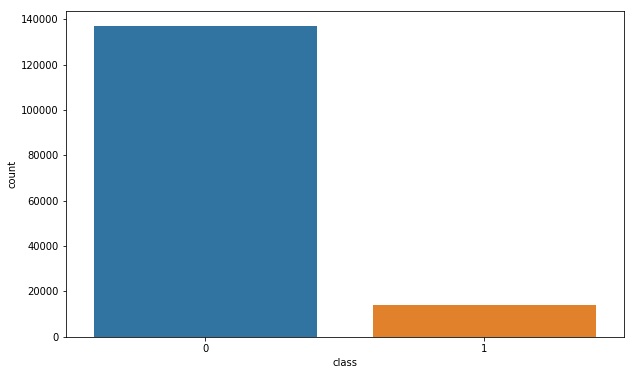

In [8]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'class', data = act)

<Figure size 720x432 with 0 Axes>

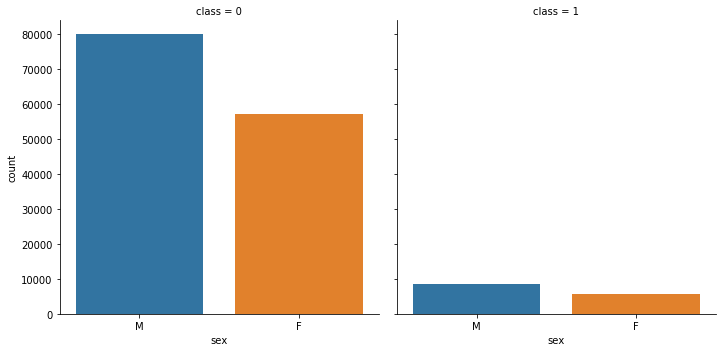

In [9]:
plt.figure(figsize = (10,6))
g = sns.catplot(x = 'sex', col = 'class', data = act, kind = 'count')

<Figure size 720x432 with 0 Axes>

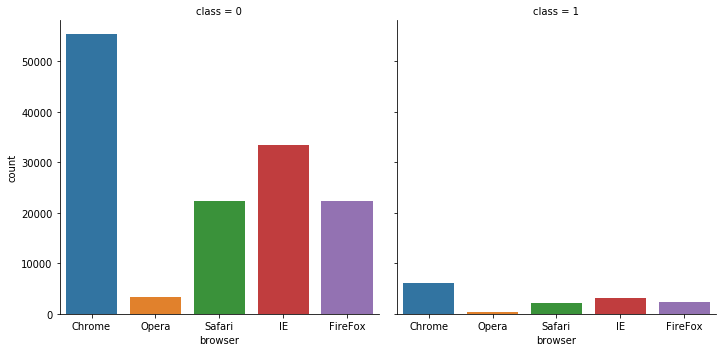

In [10]:
plt.figure(figsize = (10,6))
c = sns.catplot(x = 'browser', col = 'class', data = act, kind = 'count')

<Figure size 720x432 with 0 Axes>

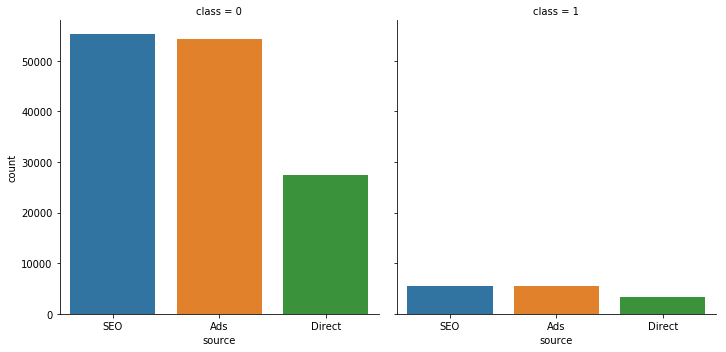

In [11]:
plt.figure(figsize = (10,6))
b = sns.catplot(x = 'source', col = 'class', data = act, kind = 'count')

Text(0.5, 0, 'Purchase Value')

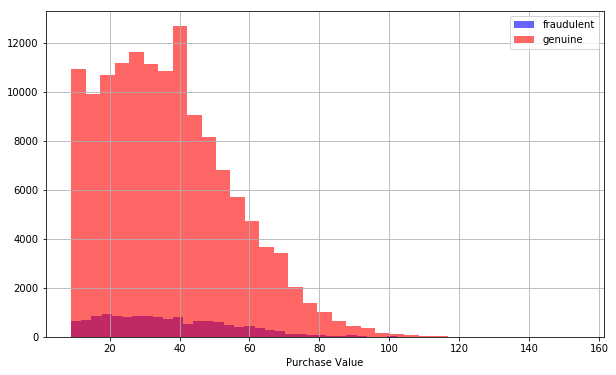

In [12]:
plt.figure(figsize = (10,6))
act[act['class']==1]['purchase_value'].hist(bins = 35, color = 'blue', label = 'fraudulent', alpha = 0.6)
act[act['class']==0]['purchase_value'].hist(bins = 35, color = 'red', label = 'genuine', alpha = 0.6)

plt.legend()
plt.xlabel('Purchase Value')



In [13]:
act['purchase_value'].describe()

count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64

### Feature Engineering

In [14]:
act['signup_time'] = pd.to_datetime(act['signup_time'])
act['purchase_time'] = pd.to_datetime(act['purchase_time'])

In [15]:
act['time_diff'] = act['purchase_time'] - act['signup_time']
act['time_diff'] = act['time_diff'].apply(lambda x: x.seconds)

In [16]:
act.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,na,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461


In [17]:
device_num = pd.pivot_table(act, values = 'user_id', index = 'device_id', aggfunc = 'count').reset_index()
device_num = device_num.rename(columns={'user_id': 'device_num'})
act = pd.merge(act, device_num, on = 'device_id', how = 'inner')


In [19]:
ip_num = pd.pivot_table(act, values = 'user_id', index = 'ip_address', aggfunc = 'count').reset_index()
ip_num = ip_num.rename(columns = {'user_id': 'ip_num'})
act = pd.merge(act, ip_num, on = 'ip_address', how = 'inner')


In [21]:
cols = ['purchase_value', 'source', 'browser', 'sex', 
        'age', 'country', 'time_diff', 'device_num', 'ip_num',
       'class']
data = act[cols]
data

,purchase_value,source,browser,sex,age,country,time_diff,device_num,ip_num,class
0,34,SEO,Chrome,M,39,Japan,13882,1,1,0
1,16,Ads,Chrome,F,53,United States,17944,1,1,0
2,15,SEO,Opera,M,53,United States,1,12,12,1
3,15,SEO,Opera,M,53,United States,1,12,12,1
4,15,SEO,Opera,M,53,United States,1,12,12,1
5,15,SEO,Opera,M,53,United States,1,12,12,1
6,15,SEO,Opera,M,53,United States,1,12,12,1
7,15,SEO,Opera,M,53,United States,1,12,12,1
8,15,SEO,Opera,M,53,United States,1,12,12,1
9,15,SEO,Opera,M,53,United States,46498,12,12,0


In [22]:
data.shape

(151112, 10)

In [23]:
data['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [24]:
cat_features = ['source', 'browser', 'sex', 'country']

In [25]:
def replace_others(df, col, thresh, replacer = 'Others'):
    """
    col: only pass in one single col name
    thresh: threshold of frequency, under which you would change it to 'Others'
    """
    freq = df[col].value_counts()
    df[col] = np.where(df[col].isin(freq.index[freq < thresh]), replacer, df[col])
    return df
    

In [26]:
data = replace_others(data, 'country', 100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [27]:
final_data = pd.get_dummies(data, columns = cat_features, drop_first = True)

In [28]:
final_data.shape

(151112, 73)

## train baseline model

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = final_data.drop('class', axis = 1)
y = final_data['class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 5)


In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
from sklearn.metrics import auc, roc_curve, classification_report

In [37]:
# metrics.accuracy_score(y_test, y_pred)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41074
           1       1.00      0.54      0.70      4260

   micro avg       0.96      0.96      0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



In [39]:
# metrics.confusion_matrix(y_test, y_pred)

In [40]:
roc_curve(y_pred, y_test)

(array([0.        , 0.04574602, 1.        ]),
 array([0.       , 0.9995637, 1.       ]),
 array([2, 1, 0]))

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
feat_imp = pd.Series(rfc.feature_importances_, index = X.columns).sort_values(ascending = False)
# feat_imp

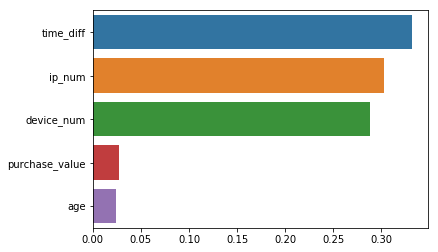

In [43]:
sns.barplot(x = feat_imp[:5], y = feat_imp.index[:5])

## H2O frame

In [44]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [45]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "13.0.2" 2020-01-14; Java(TM) SE Runtime Environment (build 13.0.2+8); Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2z/hhryxdgn41z_fxvwfpcw96gw0000gp/T/tmptm2pkce5
  JVM stdout: /var/folders/2z/hhryxdgn41z_fxvwfpcw96gw0000gp/T/tmptm2pkce5/h2o_siky1_started_from_python.out
  JVM stderr: /var/folders/2z/hhryxdgn41z_fxvwfpcw96gw0000gp/T/tmptm2pkce5/h2o_siky1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Dublin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_siky1_eycoy6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [51]:
h2o_df = H2OFrame(data)

# convert categorical variables
cate_col = ['source','browser','sex','country','class']

for col in cate_col:
    h2o_df[col] = h2o_df[col].asfactor()

h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,purchase_value,source,browser,sex,age,country,time_diff,device_num,ip_num,class
type,int,enum,enum,enum,int,enum,int,int,int,enum
mins,9.0,,,,18.0,,1.0,1.0,1.0,
mean,36.935372438985766,,,,33.14070358409672,,40942.58442744435,1.6843665625496078,1.6027185134205089,
maxs,154.0,,,,76.0,,86399.0,20.0,20.0,
sigma,18.32276214866212,,,,8.617733490961479,,26049.661902118387,2.6169536028041733,2.5962395273758494,
zeros,0,,,,0,,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0
0,34.0,SEO,Chrome,M,39.0,Japan,13882.0,1.0,1.0,0
1,16.0,Ads,Chrome,F,53.0,United States,17944.0,1.0,1.0,0
2,15.0,SEO,Opera,M,53.0,United States,1.0,12.0,12.0,1


In [53]:
strat_split = h2o_df['class'].stratified_split(test_frac=0.3, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feat = ['purchase_value', 'source', 'browser', 'sex', 'age', 'country', 'time_diff', 'device_num', 'ip_num']
target = 'class'

model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, mtries=-1, stopping_rounds=5, 
                                 stopping_metric='auc', score_each_iteration=True, seed=42)
model.train(x=feat, y=target, training_frame=train, validation_frame=test)


drf Model Build progress: |███████████████████████████████████████████████| 100%


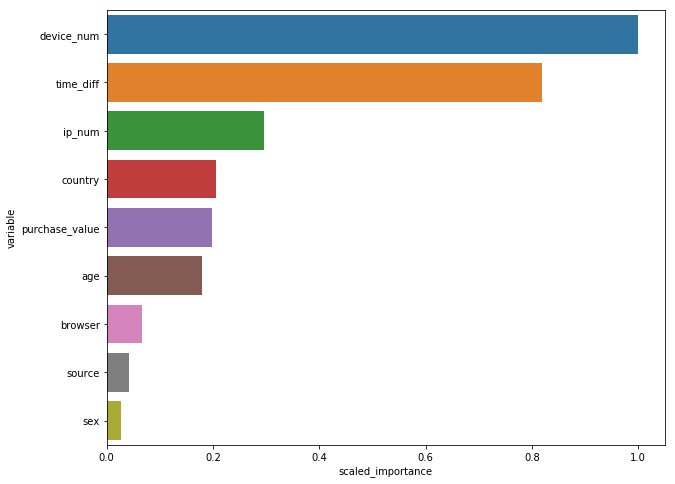

In [54]:
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.show()

In [55]:
train_true = train.as_data_frame()['class'].values
test_true = test.as_data_frame()['class'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [56]:
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41088
           1       1.00      0.54      0.70      4245

   micro avg       0.96      0.96      0.96     45333
   macro avg       0.98      0.77      0.84     45333
weighted avg       0.96      0.96      0.95     45333



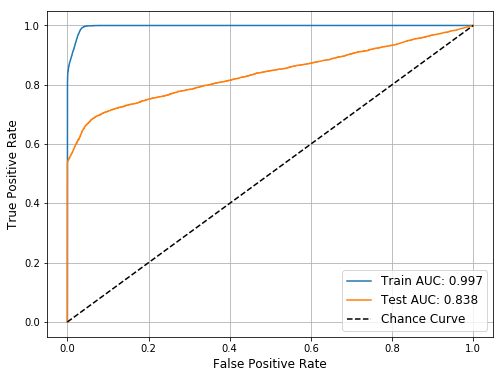

In [57]:

train_fpr = np.insert(train_fpr, 0, 0)
train_tpr = np.insert(train_tpr, 0, 0)
test_fpr = np.insert(test_fpr, 0, 0)
test_tpr = np.insert(test_tpr, 0, 0)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.plot(train_fpr, train_fpr, 'k--', label='Chance Curve')
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.grid(True)
ax.legend(fontsize=12)
plt.show()

In [58]:
# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_92db closed.
